In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]


[]

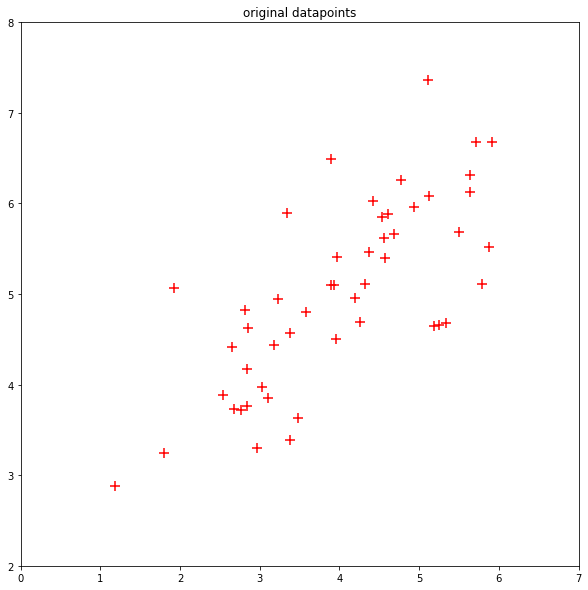

In [16]:
plt.figure(1,figsize=(10,10))
plt.scatter(x,y,c="red",marker="+",s=100)
plt.xlim((0,7))
plt.ylim((2,8))
plt.title("original datapoints")
plt.plot()

In [24]:
def normalize_data(x, y):
    
    xn = (x-np.mean(x))/np.std(x)# normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = (y-np.mean(y))/np.std(y)# normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn


In [25]:
xn, yn = normalize_data(x,y)

[]

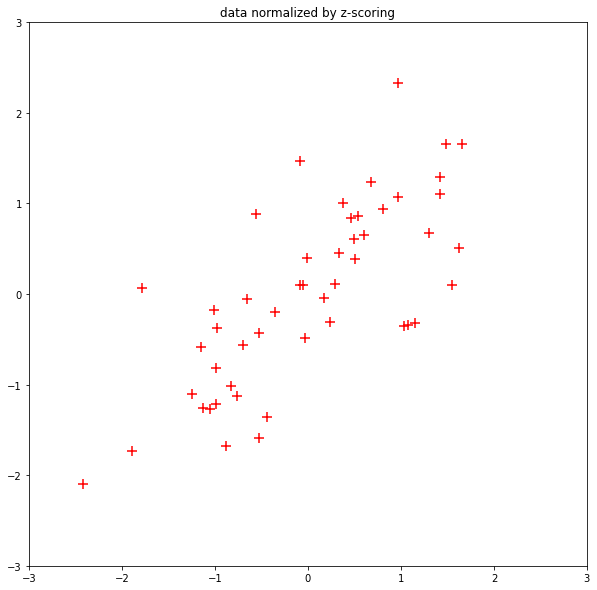

In [28]:
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.title("data normalized by z-scoring")
plt.plot()

In [109]:
def compute_covariance(x, y):
    z=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    covar = np.matmul(z.T,z)/len(x)# compute the covariance matrix #
    
    return covar


In [110]:
cov_matrix = compute_covariance(xn,yn)
cov_matrix


array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [100]:
def compute_principal_direction(covariance):
    w, v =  np.linalg.eig(covariance)
    direction = v # compute the principal directions from the co-variance matrix #
    
    return direction


In [106]:
np.cov(np.concatenate((xn.reshape(-1,1),yn.reshape(-1,1)),axis=1).T) #n-1의 자유도로 나눔

array([[1.02040816, 0.75054082],
       [0.75054082, 1.02040816]])

In [101]:
principle_axis = compute_principal_direction(cov_matrix)
principle_axis

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

[]

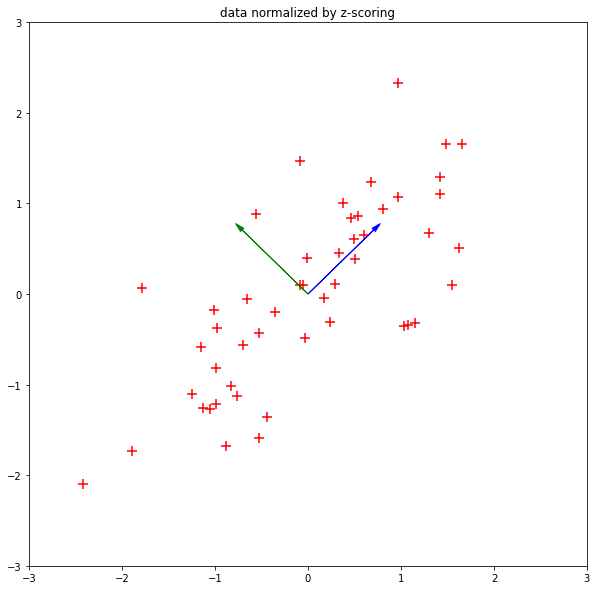

In [122]:
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.arrow(0,0,principle_axis[0,0],principle_axis[1,0],head_width=0.05, head_length=0.1,color="blue")
plt.arrow(0,0,principle_axis[0,1],principle_axis[1,1],head_width=0.05, head_length=0.1,color="green")

plt.title("data normalized by z-scoring")
plt.plot()

[]

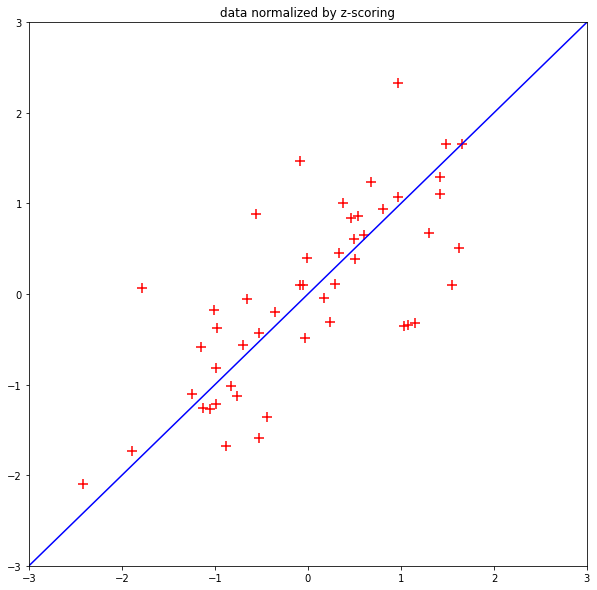

In [134]:
x_axis=np.linspace(-3,3)
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.plot(x_axis,x_axis*principle_axis[0,0]/principle_axis[1,0],c="blue")
plt.title("data normalized by z-scoring")
plt.plot()

In [139]:
first = principle_axis[:,0]
np.dot(first,first) # normalized

0.9999999999999998

In [160]:
def compute_projection(point, axis):
    
    temp = np.dot(point,axis) # compute the projection of point on the axis #
    projection = np.matmul(temp.reshape(-1,1),axis.reshape(1,-1))
    
    return projection


In [144]:
z=np.concatenate((xn.reshape(-1,1),yn.reshape(-1,1)),axis=1)

In [163]:
projected_first = compute_projection(z,first)

[]

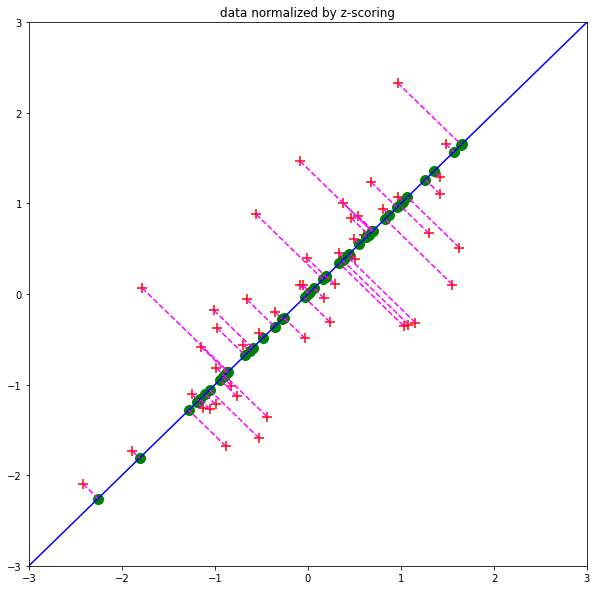

In [171]:

plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.plot(x_axis,x_axis*principle_axis[0,0]/principle_axis[1,0],c="blue")
plt.scatter(projected_first[:,0],projected_first[:,1],c="green",s=100)
for i in range(len(x)):
    plt.plot([xn[i],projected_first[i,0]],[yn[i],projected_first[i,1]],c="magenta",linestyle = '--')
plt.title("data normalized by z-scoring")
plt.plot()

# outputs

## 1. Plot the original data points [1pt]

[]

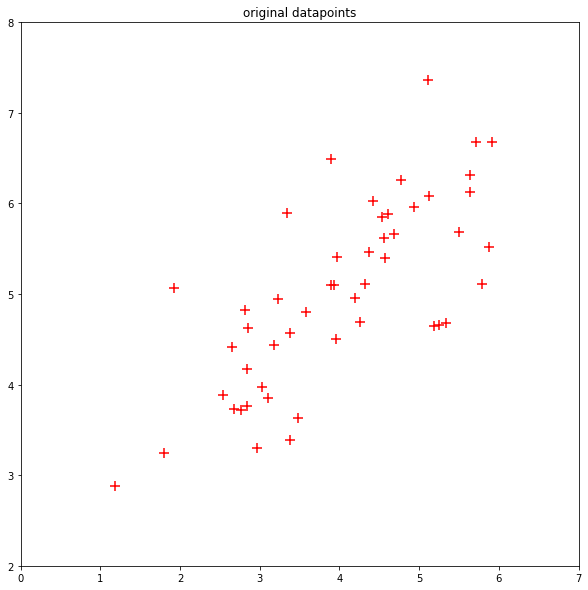

In [17]:
plt.figure(1,figsize=(10,10))
plt.scatter(x,y,c="red",marker="+",s=100)
plt.xlim((0,7))
plt.ylim((2,8))
plt.title("original datapoints")
plt.plot()

## 2. Plot the normalized data points [1pt]

[]

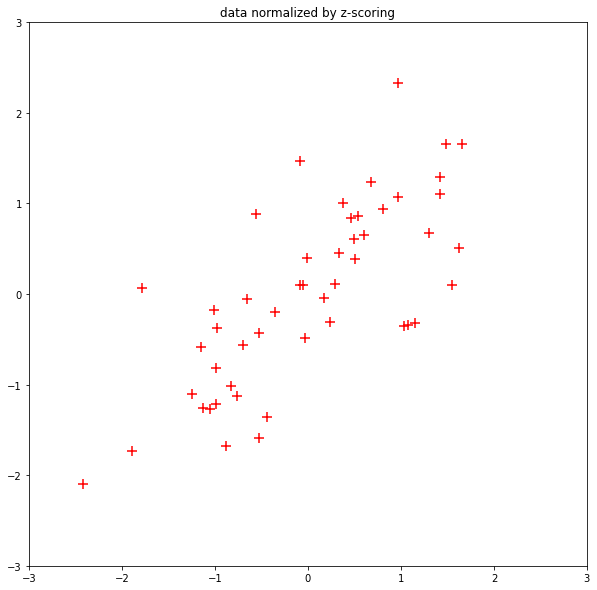

In [29]:
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.title("data normalized by z-scoring")
plt.plot()

## 3. Plot the principal axes [2pt]

[]

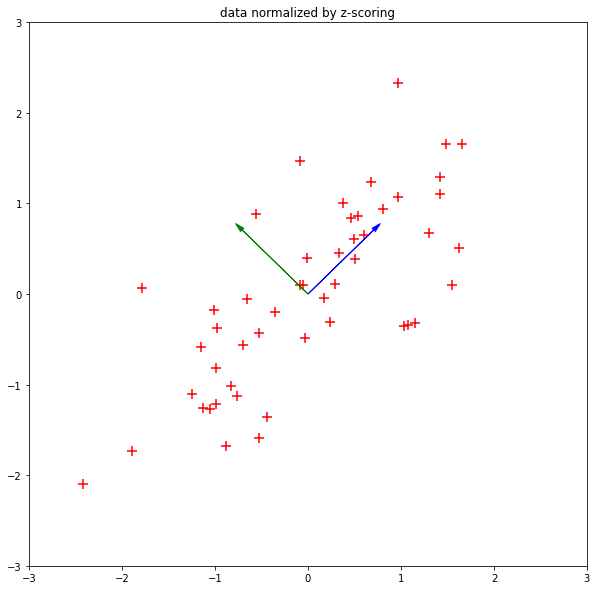

In [123]:
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.arrow(0,0,principle_axis[0,0],principle_axis[1,0],head_width=0.05, head_length=0.1,color="blue")
plt.arrow(0,0,principle_axis[0,1],principle_axis[1,1],head_width=0.05, head_length=0.1,color="green")

plt.title("data normalized by z-scoring")
plt.plot()

## 4. Plot the first principal axis [3pt]

[]

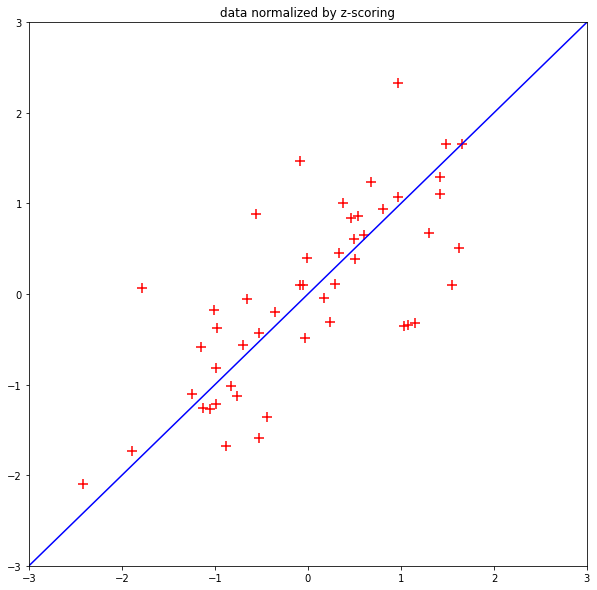

In [135]:
plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.plot(x_axis,x_axis*principle_axis[0,0]/principle_axis[1,0],c="blue")
plt.title("data normalized by z-scoring")
plt.plot()

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

[]

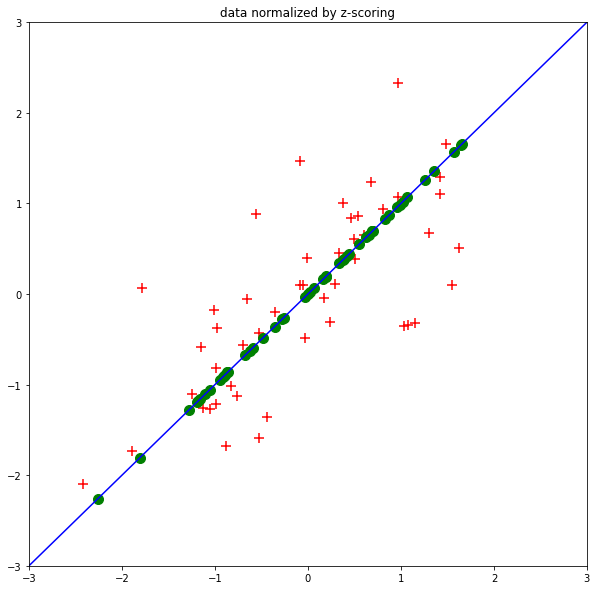

In [167]:

plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.plot(x_axis,x_axis*principle_axis[0,0]/principle_axis[1,0],c="blue")
plt.scatter(projected_first[:,0],projected_first[:,1],c="green",s=100)
plt.title("data normalized by z-scoring")
plt.plot()

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

[]

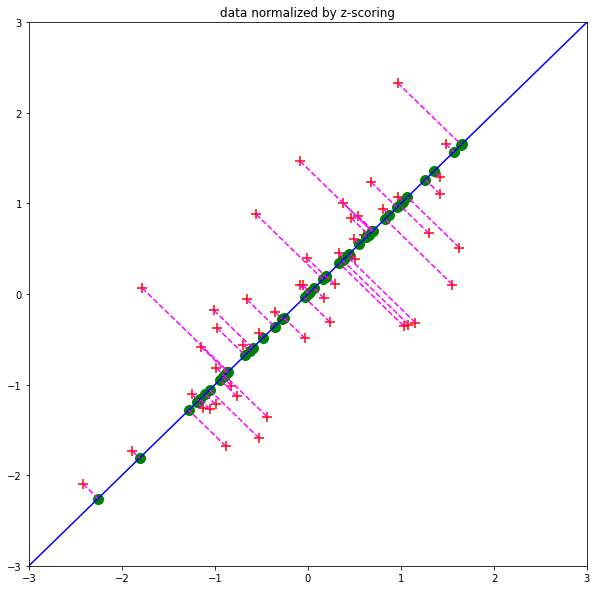

In [172]:

plt.figure(1,figsize=(10,10))
plt.xlim((-3,3))
plt.ylim((-3,3))
plt.scatter(xn,yn,c="red",marker="+",s=100)
plt.plot(x_axis,x_axis*principle_axis[0,0]/principle_axis[1,0],c="blue")
plt.scatter(projected_first[:,0],projected_first[:,1],c="green",s=100)
for i in range(len(x)):
    plt.plot([xn[i],projected_first[i,0]],[yn[i],projected_first[i,1]],c="magenta",linestyle = '--')
plt.title("data normalized by z-scoring")
plt.plot()

## 7. Plot the second principal axis [3pt]

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]